<a href="https://colab.research.google.com/github/KuanChihLee/Supervised-Learning/blob/master/Project_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing supervised learning techniques in Adult Income prediction
### 1. Data: 1994 Adult Census dataset, UCI Machine Learning Repository
### 2. Goal: Considering this dataset as classification problem and exploring key feature contributing to higher or lower income.
### 3. Tasks: 
#### a. dealing with missing data (drop or padding)
#### b. feature selection/engineering (categorical and numerical data)
#### c. Imbalanced observation (oversampling)
#### d. Analytical Modeling and selection

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd "/content/drive/My Drive/Supervised_Learning/Final_Project"

/content/drive/My Drive/Supervised_Learning/Final_Project


#### Original data

In [4]:
import pandas as pd

csv_file = "./adult_income.csv"     
    
# Saving CSV file to dataframe
df_adult = pd.read_csv(csv_file, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                                     'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                                     'hours-per-week', 'native-country', 'label'], index_col=False)
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Missing data

In [5]:
df_adult[df_adult.isnull() == True].count()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

In [6]:
for col in df_adult.columns:
  print(col, ': ', df_adult.loc[df_adult[col].apply(str) == ' ?', col].count())
  

age :  0
workclass :  1836
fnlwgt :  0
education :  0
education-num :  0
marital-status :  0
occupation :  1843
relationship :  0
race :  0
sex :  0
capital-gain :  0
capital-loss :  0
hours-per-week :  0
native-country :  583
label :  0


In [7]:

for col in df_adult.columns:
  df_adult.loc[df_adult[col].apply(str).map(lambda x: x.replace(" ","")) == '?', col] = 'Unknown'
  print(col, ': ', df_adult.loc[df_adult[col].apply(str) == '?', col].count())
  print(col, ': ', df_adult.loc[df_adult[col].apply(str) == 'Unknown', col].count())

age :  0
age :  0
workclass :  0
workclass :  1836
fnlwgt :  0
fnlwgt :  0
education :  0
education :  0
education-num :  0
education-num :  0
marital-status :  0
marital-status :  0
occupation :  0
occupation :  1843
relationship :  0
relationship :  0
race :  0
race :  0
sex :  0
sex :  0
capital-gain :  0
capital-gain :  0
capital-loss :  0
capital-loss :  0
hours-per-week :  0
hours-per-week :  0
native-country :  0
native-country :  583
label :  0
label :  0


#### Transfer numerical data with log transformation

In [8]:
df_adult_processed = pd.DataFrame()
df_adult_processed["log-age"] = np.log1p(df_adult.age)
df_adult_processed["log-fnlwgt"] = np.log1p(df_adult.fnlwgt)
df_adult_processed["log-edunum"] = np.log1p(df_adult['education-num'])
df_adult_processed["log-hrs"] = np.log1p(df_adult['hours-per-week'])
extra_income = df_adult['capital-gain'] - df_adult['capital-loss']
df_adult_processed["log-extracap"] = np.log( (extra_income-min(extra_income)) / (max(extra_income) - min(extra_income)) )
## Remain
df_adult_processed['relationship'] = df_adult.relationship.map(lambda x: x.replace(" ",""))
df_adult_processed['sex'] = df_adult.sex.map(lambda x: x.replace(" ",""))
df_adult_processed.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


,log-age,log-fnlwgt,log-edunum,log-hrs,log-extracap,relationship,sex
0,3.688879,11.258253,2.639057,3.713572,-2.771392,Not-in-family,Male
1,3.931826,11.330348,2.639057,2.639057,-3.176244,Husband,Male
2,3.663562,12.281398,2.302585,3.713572,-3.176244,Not-in-family,Male
3,3.988984,12.366157,2.079442,3.713572,-3.176244,Husband,Male
4,3.367296,12.732013,2.639057,3.713572,-3.176244,Wife,Female


#### Transfer categorical data with fewer category
E.g. transfer marital-status by 'live with spouse' or 'not live with spouse'

In [0]:
# Binary
## marital-status
df_adult_processed['marstatus'] = 0
df_adult_processed.loc[df_adult['marital-status'].map(lambda x: x.replace(" ","")) == 'Married-civ-spouse', 'marstatus'] = 1
df_adult_processed.loc[df_adult['marital-status'].map(lambda x: x.replace(" ","")) == 'Married-AF-spouse', 'marstatus'] = 1
## race
df_adult_processed['race'] = 1
df_adult_processed.loc[df_adult['race'].map(lambda x: x.replace(" ","")) == 'Black', 'race'] = 0
## native-country
df_adult_processed['native'] = 1
df_adult_processed.loc[df_adult['native-country'].map(lambda x: x.replace(" ","")) != 'United-States', 'native'] = 0

# Nominal variable
## workclass
df_adult_processed['workclass'] = 1
df_adult_processed.loc[df_adult['workclass'].map(lambda x: x.replace(" ","")) == 'Self-emp-inc', 'workclass'] = 2
df_adult_processed.loc[df_adult['workclass'].map(lambda x: x.replace(" ","")) == 'Self-emp-not-inc', 'workclass'] = 2
df_adult_processed.loc[df_adult['workclass'].map(lambda x: x.replace(" ","")) == 'Private', 'workclass'] = 3
df_adult_processed.loc[df_adult['workclass'].map(lambda x: x.replace(" ","")) == 'Never-worked', 'workclass'] = 4
df_adult_processed.loc[df_adult['workclass'].map(lambda x: x.replace(" ","")) == 'Without-pay', 'workclass'] = 4
df_adult_processed.loc[df_adult['workclass'].map(lambda x: x.replace(" ","")) == 'Unknown', 'workclass'] = 5
## education
df_adult_processed['edulevels'] = 1
df_adult_processed.loc[df_adult['education'].map(lambda x: x.replace(" ","")) == 'HS-grad', 'edulevels'] = 2
df_adult_processed.loc[df_adult['education'].map(lambda x: x.replace(" ","")) == 'Some-college', 'edulevels'] = 3
df_adult_processed.loc[df_adult['education'].map(lambda x: x.replace(" ","")) == 'Assoc-acdm', 'edulevels'] = 3
df_adult_processed.loc[df_adult['education'].map(lambda x: x.replace(" ","")) == 'Assoc-voc', 'edulevels'] = 3
df_adult_processed.loc[df_adult['education'].map(lambda x: x.replace(" ","")) == 'Bachelors', 'edulevels'] = 4
df_adult_processed.loc[df_adult['education'].map(lambda x: x.replace(" ","")) == 'Masters', 'edulevels'] = 5
df_adult_processed.loc[df_adult['education'].map(lambda x: x.replace(" ","")) == 'Prof-school', 'edulevels'] = 6
df_adult_processed.loc[df_adult['education'].map(lambda x: x.replace(" ","")) == 'Doctorate', 'edulevels'] = 6
## occupation
df_adult_processed['occupation'] = 1
df_adult_processed.loc[df_adult['occupation'].map(lambda x: x.replace(" ","")) == 'Farming-fishing', 'occupation'] = 2
df_adult_processed.loc[df_adult['occupation'].map(lambda x: x.replace(" ","")) == 'Handlers-cleaners', 'occupation'] = 2
df_adult_processed.loc[df_adult['occupation'].map(lambda x: x.replace(" ","")) == 'Unknown', 'occupation'] = 3

## label
df_adult_processed['label'] = 0
df_adult_processed.loc[df_adult['label'].map(lambda x: x.replace(" ","")) == '>50K', 'label'] = 1

In [10]:
df_adult_processed.head()

,log-age,log-fnlwgt,log-edunum,log-hrs,log-extracap,relationship,sex,marstatus,race,native,workclass,edulevels,occupation,label
0,3.688879,11.258253,2.639057,3.713572,-2.771392,Not-in-family,Male,0,1,1,1,4,1,0
1,3.931826,11.330348,2.639057,2.639057,-3.176244,Husband,Male,1,1,1,2,4,1,0
2,3.663562,12.281398,2.302585,3.713572,-3.176244,Not-in-family,Male,0,1,1,3,2,2,0
3,3.988984,12.366157,2.079442,3.713572,-3.176244,Husband,Male,1,0,1,3,1,2,0
4,3.367296,12.732013,2.639057,3.713572,-3.176244,Wife,Female,1,0,0,3,4,1,0


#### Overview of Correlation
Most of features are not highly correlated to income. 

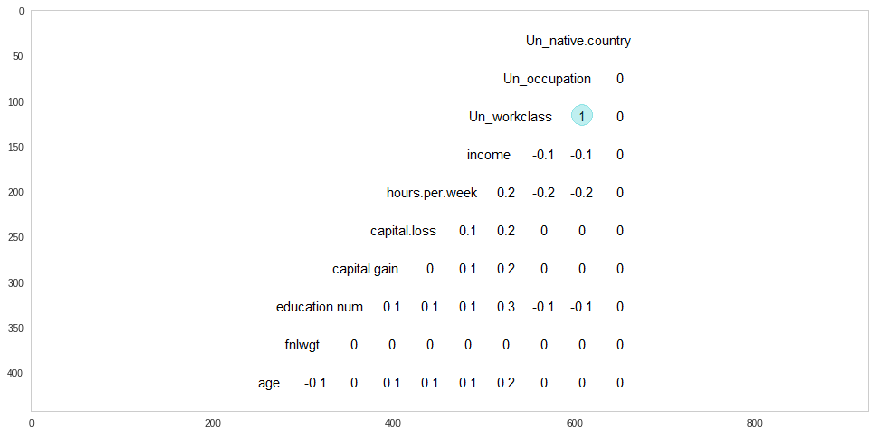

In [15]:
import matplotlib.image as mpimg
img=mpimg.imread('Correlation.png')
plt.figure(figsize=(15,8))
imgplot = plt.imshow(img)
plt.grid(False)
plt.show()

#### Bivariate EDA
Although correlation matrix isn't too much helpful in this case, we can observe some 'signal' variables might be helpful to separate higher and lower income group.

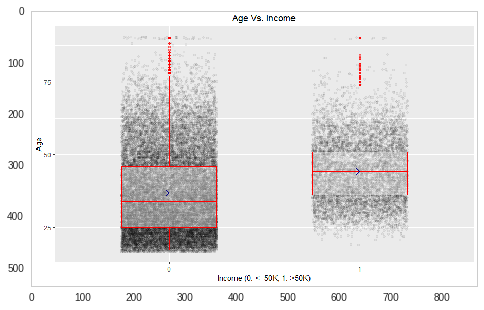

In [16]:
img=mpimg.imread('Bivariate_AgeVSIncome.png')
plt.figure(figsize=(8,8))
imgplot = plt.imshow(img)
plt.grid(False)
plt.show()

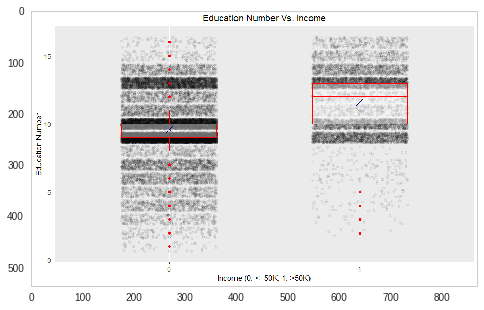

In [17]:
img=mpimg.imread('Bivariate_EduNumVSIncome.png')
plt.figure(figsize=(8,8))
imgplot = plt.imshow(img)
plt.grid(False)
plt.show()

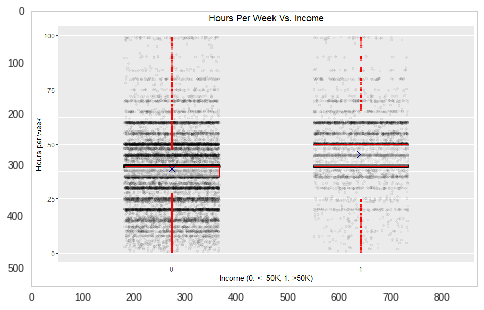

In [18]:
img=mpimg.imread('Bivariate_HrPerWeekVSIncome.png')
plt.figure(figsize=(8,8))
imgplot = plt.imshow(img)
plt.grid(False)
plt.show()

#### Multivariate EDA
Furthermore, we can see most population grouped with higher education level and elder.

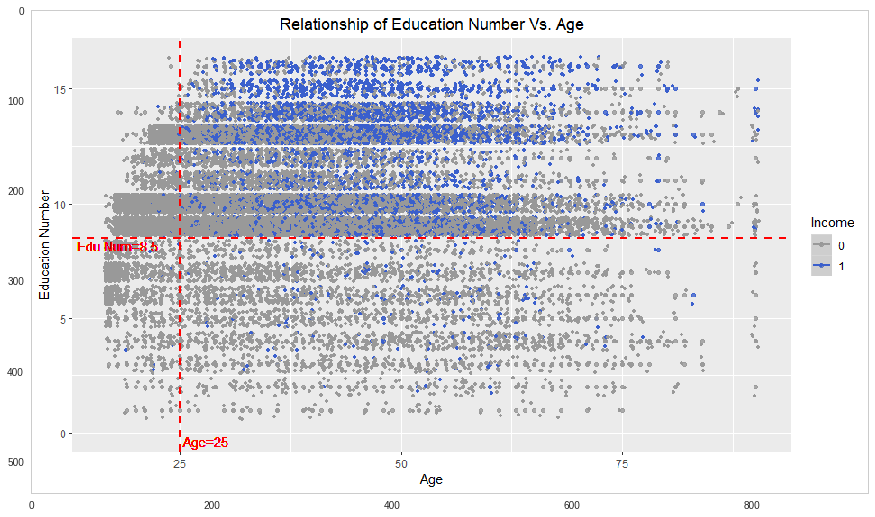

In [21]:
img=mpimg.imread('Multivariate_EduNumVSAge.png')
plt.figure(figsize=(15,12))
imgplot = plt.imshow(img)
plt.grid(False)
plt.show()

It doesn't suprise us that people who have no matter capital gain or loss, they will be likely to have higher income. In other words, the blue points (label 1) are observed when capital gain and loss happened. It's also helpful for us to understand the insights from given dataset. More EDA can help us to 'expect' the importance of variables and following modeling.

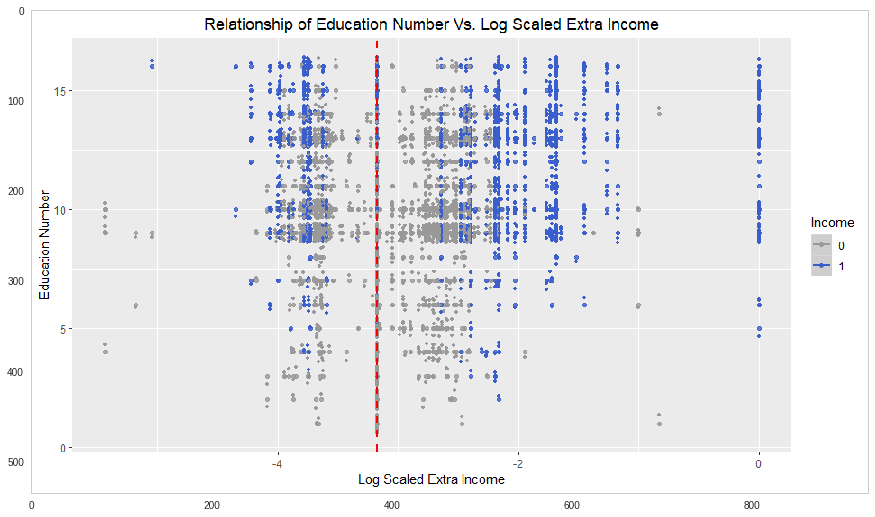

In [22]:
img=mpimg.imread('Multivariate_EduNumVSLogScalExtraIncome.png')
plt.figure(figsize=(15,12))
imgplot = plt.imshow(img)
plt.grid(False)
plt.show()

#### Analytical models will be provided by R code because there are some built-in functions that are useful as we want to analyze tree structure or neural network. (R is pretty powerful in statistic analysis)